In [5]:
# Import necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
import math  # For mathematical operations

# Load the dataset
# The dataset 'Ads_CTR_Optimisation.csv' should be in the same directory as this script
ds = pd.read_csv('Ads_CTR_Optimisation.csv')

# Display the first 5 rows of the dataset to get an overview of the data
ds.head()


,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Load the dataset
ds = pd.read_csv('Ads_CTR_Optimisation.csv')

# Define variables
d = 10  # Total number of ads
numbers_of_selection = [0] * d  # Number of times each ad was selected
sums_of_rewards = [0] * d  # Sum of rewards for each ad
N = 10000  # Total number of rounds (iterations)
ads_selected = []  # List to keep track of all selected ads
total_reward = 0  # Total reward accumulated over all rounds

# Implement the UCB (Upper Confidence Bound) algorithm
for n in range(0, N):
    max_upper_bound = 0  # Initialize the max upper bound to 0 for each round
    ad = 0  # Initialize the ad index for selection
    
    for i in range(0, d):
        if numbers_of_selection[i] > 0:
            # Calculate the average reward for ad i
            average_reward = sums_of_rewards[i] / float(numbers_of_selection[i])
            # Calculate the confidence interval for ad i
            delta_i = math.sqrt((3/float(2)) * (math.log(n + 1) / float(numbers_of_selection[i])))
            # Calculate the upper bound for ad i
            upper_bound = average_reward + delta_i
        else:
            # If the ad hasn't been selected yet, set its upper bound to a very high number
            upper_bound = 1e400
        
        # Select the ad with the maximum upper bound
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    
    # Append the selected ad to the list of selected ads
    ads_selected.append(ad)
    # Increment the selection count for the selected ad
    numbers_of_selection[ad] += 1
    # Get the reward for the selected ad from the dataset
    reward = ds.values[n, ad]
    # Update the sum of rewards for the selected ad
    sums_of_rewards[ad] += reward
    # Update the total reward
    total_reward += reward

print(total_reward)  # Output the total reward at the end


2178


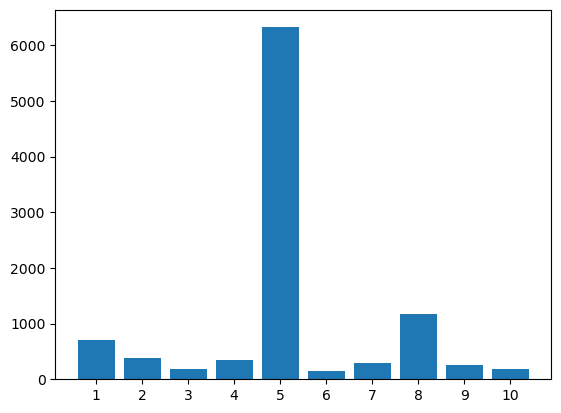

In [9]:
# Import necessary libraries
import matplotlib.pyplot as plt  # For data visualization

# Create a bar chart to display the number of selections for each ad
# The range(1, 11) creates x-ticks from 1 to 10, corresponding to the ads
plt.bar(range(1, 11), numbers_of_selection, align="center")

# Set the x-ticks to match the ad numbers
plt.xticks(range(1, 11))

# Display the bar chart
plt.show()
